<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [91]:
# librerias

import pandas as pd
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)
from scipy.stats import bernoulli, beta  
from mpmath import betainc  

In [92]:
# datos
df= pd.read_csv('data/cookie_cats.csv')
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


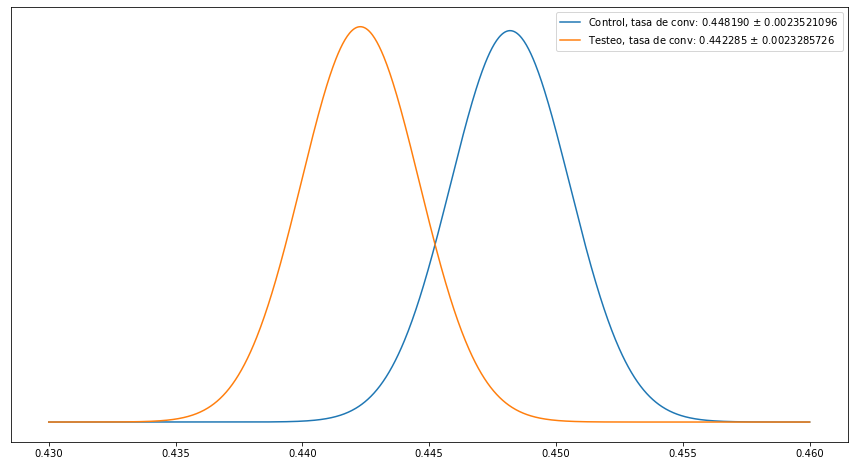

(0.44819023757326293, 0.44228528719966587)

In [97]:
# transformacion
grupo_control=df.loc[df['version']=='gate_30']

grupo_tratamiento=df.loc[df['version']=='gate_40']

con_control= len(grupo_control.loc[grupo_control['retention_1']== True])
con_tratamiento= len(grupo_tratamiento.loc[grupo_tratamiento['retention_1']== True])

imp_control=len(df.loc[df['version']=='gate_30'])
imp_tratamiento=len(df.loc[df['version']=='gate_40'])

a_C, b_C = con_control+1, imp_control-con_control+1
a_T, b_T = con_tratamiento+1, imp_tratamiento-con_tratamiento+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)
beta_control.mean(),beta_test.mean()



x=np.linspace(0.43, 0.46, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();
    
    
plot([beta_control, beta_test], ['Control', 'Testeo'])  

beta_control.mean(),beta_test.mean()

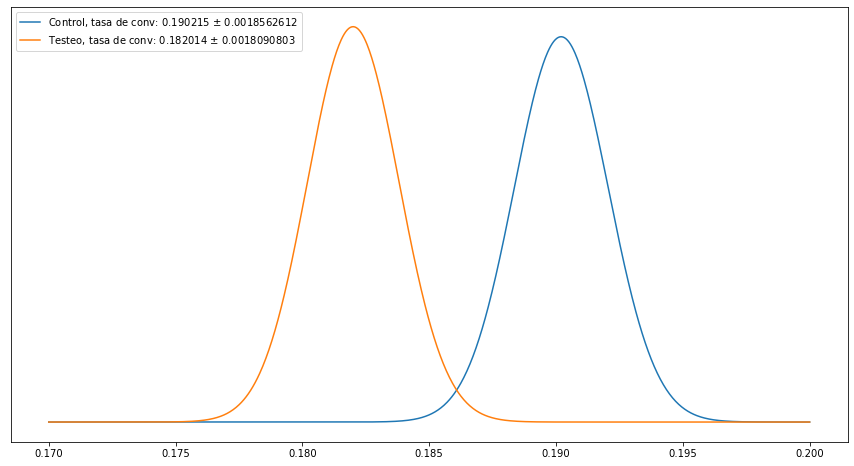

In [100]:
grupo_control=df.loc[df['version']=='gate_30']

grupo_tratamiento=df.loc[df['version']=='gate_40']

con_control= len(grupo_control.loc[grupo_control['retention_7']== True])
con_tratamiento= len(grupo_tratamiento.loc[grupo_tratamiento['retention_7']== True])

imp_control=len(df.loc[df['version']=='gate_30'])
imp_tratamiento=len(df.loc[df['version']=='gate_40'])

a_C, b_C = con_control+1, imp_control-con_control+1
a_T, b_T = con_tratamiento+1, imp_tratamiento-con_tratamiento+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)
beta_control.mean(),beta_test.mean()


x=np.linspace(0.17, 0.20, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();
    
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [24]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.

#for day 1 the retenion was a 44.2% of the population for version gate_40 while gate_30 had a 44.8% of retention meaning the change would decrease the use of the app for day 1
#for day 7 the retenion was a 18.2% of the population for version gate_40 while gate_30 had a 19.02% of retention meaning the change would decrease the use of the app for day 7

In [95]:
salto_dia_1=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto_dia_1

-0.013175098158249857

In [99]:
prob=beta.cdf( 0.445,a_T, b_T)
prob

0.8781293616836622

In [94]:
salto_dia_7=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto_dia_7

-0.013175098158249857

In [101]:
prob=beta.cdf( 0.187,a_T, b_T)
prob

0.9969223759549681